In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
#!pip install torch tensorflow lightgbm xgboost

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
submit = pd.read_csv('submit_sample.csv', header=None)

In [4]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,0


In [5]:
cols = train.columns[:-1]

In [6]:
train[cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720
std,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889
min,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000
50%,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000
75%,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000
max,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000


In [7]:
test[cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000
mean,36.104266,47158.451801,16.763934,229.315014,1.770083,436.171801,0.090859
std,7.863805,31469.525699,8.571112,208.796946,0.944872,251.392519,0.375801
min,20.000000,-6838.000000,2.000000,0.000000,1.000000,-1.000000,0.000000
25%,31.000000,19654.500000,8.000000,121.000000,1.000000,219.250000,0.000000
50%,33.000000,46886.000000,17.000000,158.000000,1.000000,436.000000,0.000000
75%,37.000000,74178.000000,26.000000,345.000000,2.000000,654.000000,0.000000
max,90.000000,102124.000000,31.000000,3076.000000,4.000000,870.000000,3.000000


In [8]:
train[cols].describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27100,27100,27100,27100,27100,27100,27100,27100,27100
unique,11,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5957,17565,15955,27090,15819,23651,19147,11232,23099


In [9]:
cols_i = train[cols].select_dtypes(exclude='object').columns.tolist()
cols_i

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
cols_o = train.select_dtypes(include='object').columns.tolist()
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
train[cols_i].isnull().any()

age         False
balance     False
day         False
duration    False
campaign    False
pdays       False
previous    False
dtype: bool

In [12]:
train.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

## 数値データの解析

In [92]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_bin'],
      dtype='object')

In [14]:
train['age_bin'] = pd.cut(train['age'], [19, 30, 40, 50, 60, 100])
test['age_bin'] = pd.cut(test['age'], [19, 30, 40, 50, 60, 100])
print(train['age_bin'])
cols_o.append('age_bin')

id
0        (30, 40]
1        (19, 30]
2        (30, 40]
3        (30, 40]
4        (40, 50]
           ...   
27095    (30, 40]
27096    (30, 40]
27097    (30, 40]
27098    (19, 30]
27099    (30, 40]
Name: age_bin, Length: 27100, dtype: category
Categories (5, interval[int64]): [(19, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]


In [15]:
test['age_bin'].isnull().sum()

0

In [16]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_bin
id,,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0,"(30, 40]"
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1,"(19, 30]"
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0,"(30, 40]"
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0,"(30, 40]"
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0,"(30, 40]"
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0,"(30, 40]"
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,0,"(30, 40]"


In [17]:
df_bank_corr = train[cols_i].corr()
df_bank_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,-0.001185,-0.059669,-0.055642,0.037633,0.008551,0.037545
balance,-0.001185,1.000000,0.003816,0.003144,-0.001229,0.003018,0.009717
day,-0.059669,0.003816,1.000000,0.134440,-0.060326,-0.000433,-0.048624
duration,-0.055642,0.003144,0.134440,1.000000,-0.094643,0.003804,-0.015184
campaign,0.037633,-0.001229,-0.060326,-0.094643,1.000000,-0.003626,-0.038244
pdays,0.008551,0.003018,-0.000433,0.003804,-0.003626,1.000000,0.002187
previous,0.037545,0.009717,-0.048624,-0.015184,-0.038244,0.002187,1.000000


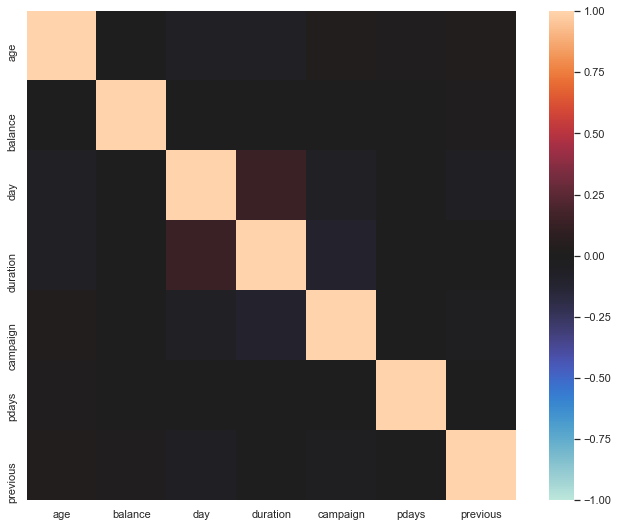

In [18]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_bank_corr, square=True, vmax=1, vmin=-1, center=0)

## カテゴリカルデータの解析

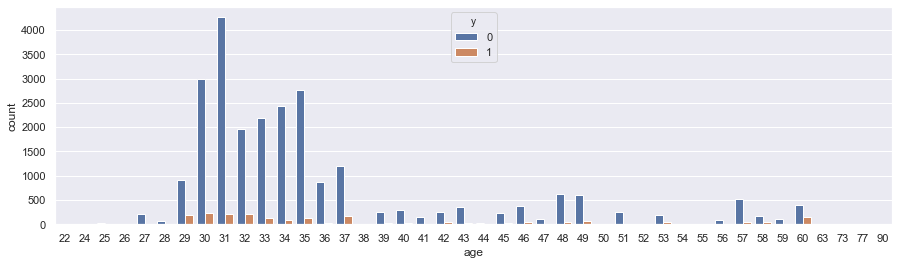

In [19]:
plt.figure(figsize=(15, 4))
sns.countplot(x=cols[0], data=train, hue='y')

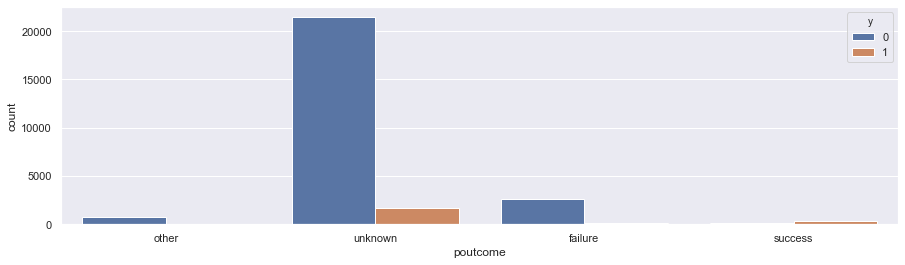

In [20]:
plt.figure(figsize=(15, 4))
sns.countplot(x=cols[15], data=train, hue='y')

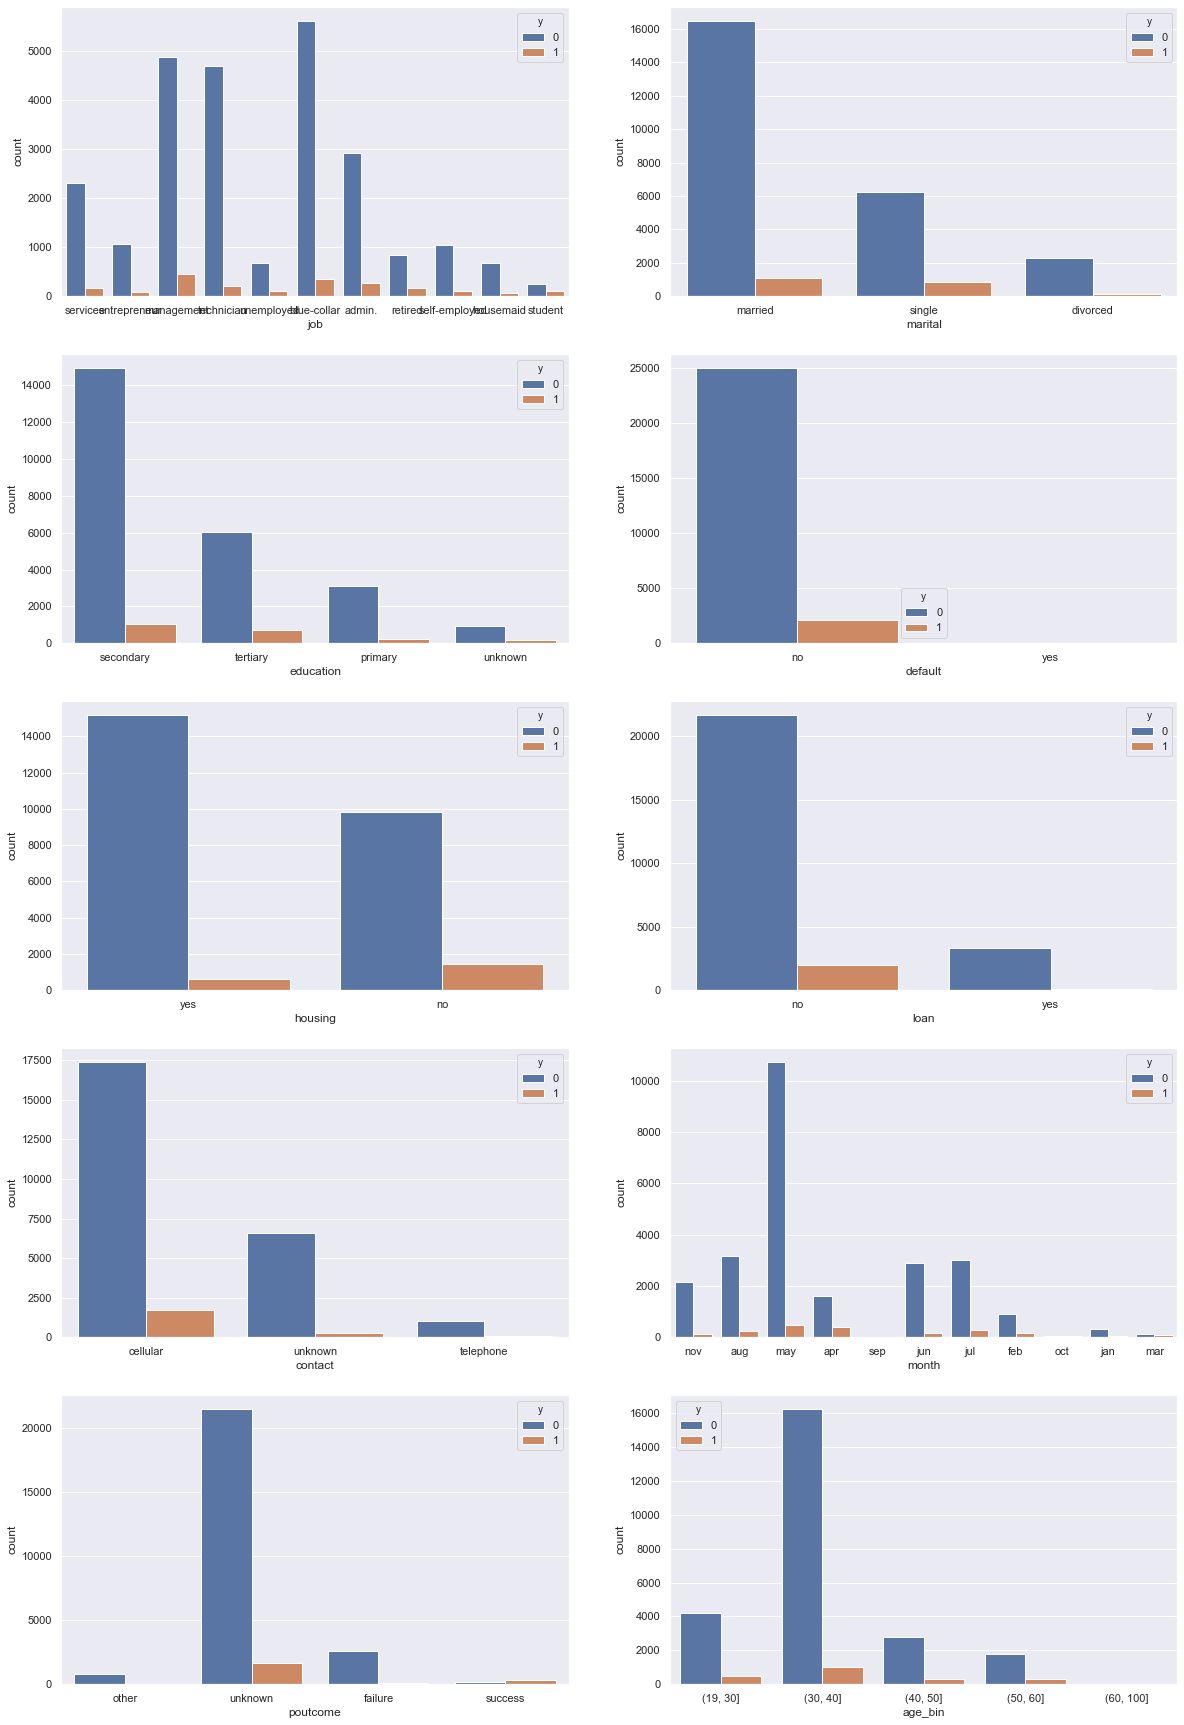

In [21]:
#グラフを作る
fig = plt.figure(figsize=(20,len(cols_o)*5))
width = 2

for i, col in enumerate(cols_o):
    ax = fig.add_subplot(len(cols)//width,width,i+1)
    sns.countplot(x=col, data=train, hue='y')
    

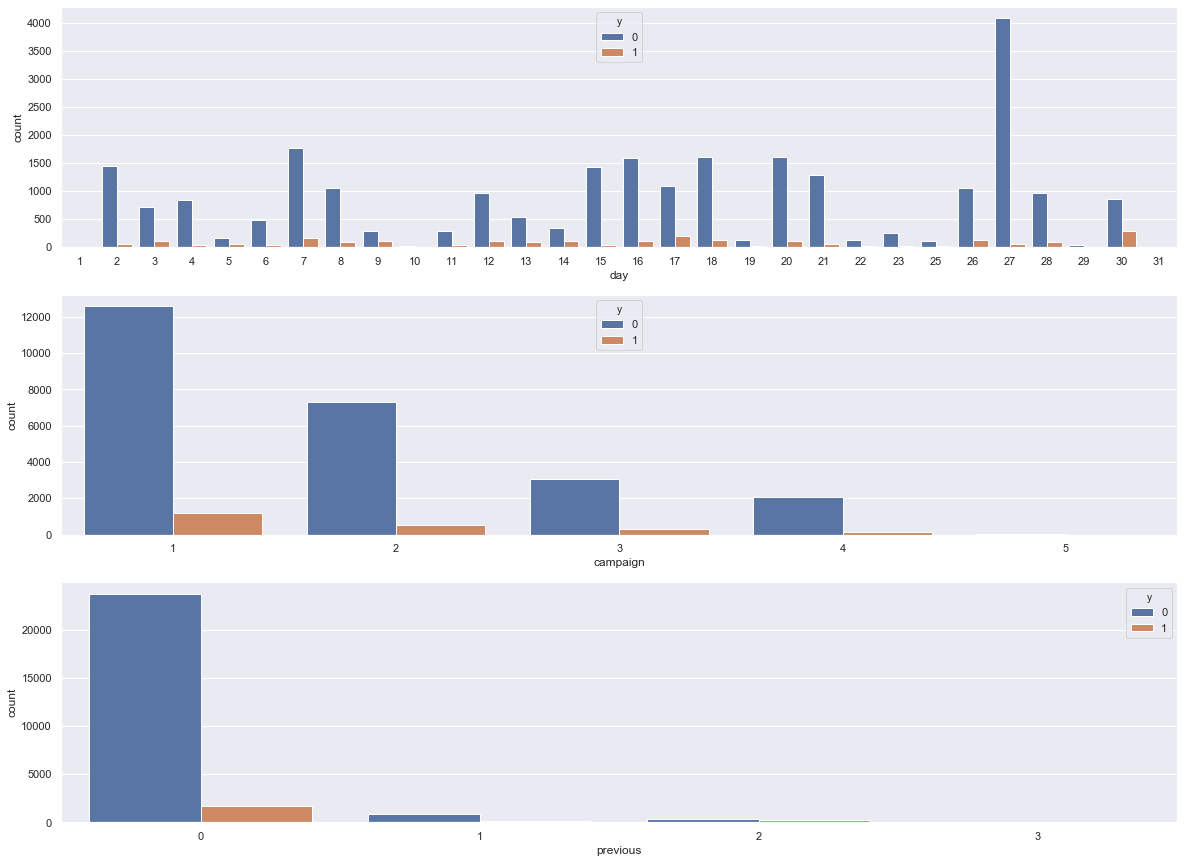

In [22]:
#グラフを作る
sel_cols = ['day', 'campaign', 'previous']
fig = plt.figure(figsize=(20,len(sel_cols)*5))
width = 1

for i, col in enumerate(sel_cols):
    ax = fig.add_subplot(len(sel_cols)//width,width,i+1)
    sns.countplot(x=col, data=train, hue='y')
    

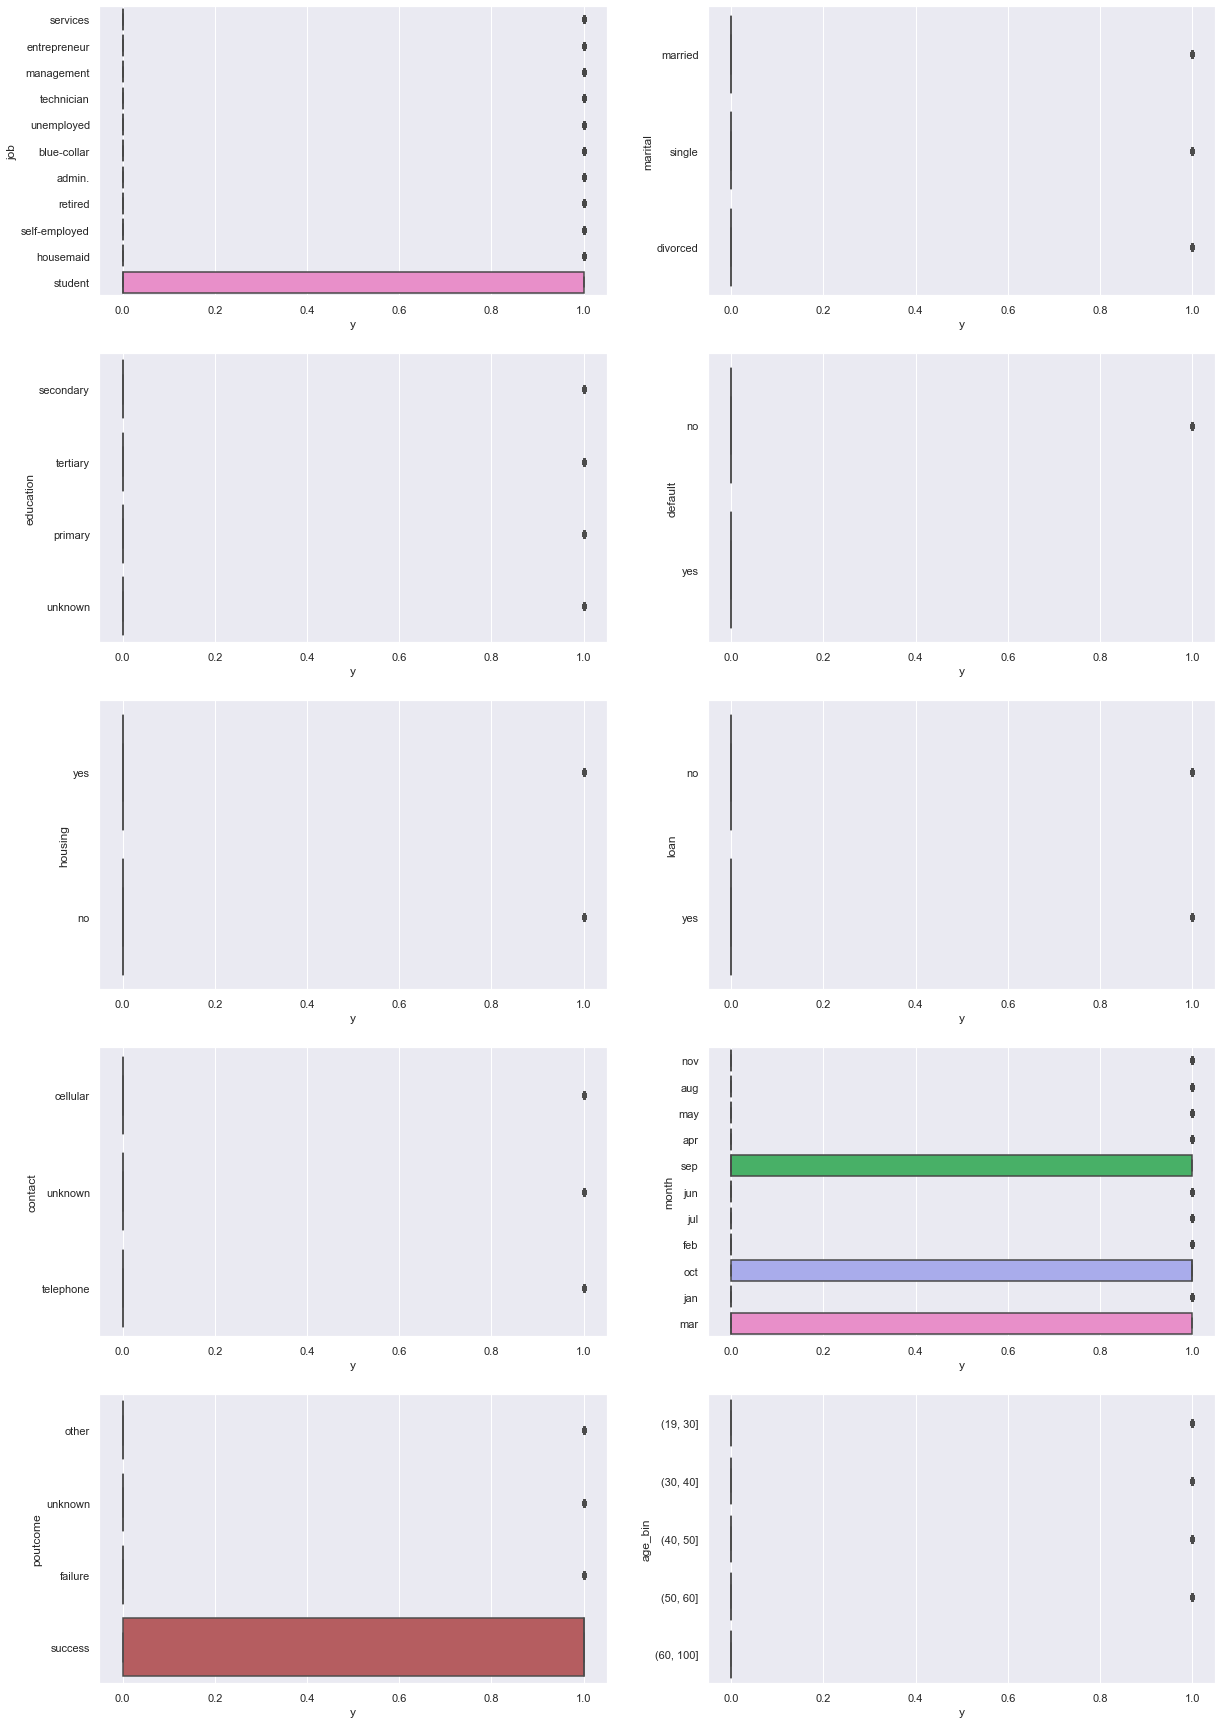

In [23]:
#グラフを作る
fig = plt.figure(figsize=(20,len(cols_o)*5))
width = 2

for i, col in enumerate(cols_o):
    ax = fig.add_subplot(len(cols)//width,width,i+1)
    sns.boxplot(x='y', y=col, data=train)
    

In [24]:
df_bank_corr = pd.get_dummies(pd.concat([train[cols_o], train['y']], axis=1)).corr()
df_bank_corr

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,"age_bin_(19, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 100]"
y,1.000000,0.011805,-0.039639,0.003398,0.007732,0.016039,0.065412,0.014510,-0.014142,0.092861,...,0.025725,-0.042507,-0.019517,0.294006,-0.061383,0.035675,-0.094712,0.025379,0.090512,-0.006369
job_admin.,0.011805,1.000000,-0.193778,-0.077026,-0.061759,-0.180975,-0.071607,-0.077304,-0.115634,-0.041940,...,0.002995,0.016582,0.009903,0.018785,-0.025664,0.006540,0.033477,-0.017041,-0.049095,-0.002766
job_blue-collar,-0.039639,-0.193778,1.000000,-0.111994,-0.089796,-0.263133,-0.104114,-0.112398,-0.168129,-0.060979,...,0.000184,-0.029739,0.012664,-0.009454,0.022476,-0.125729,0.190771,-0.071794,-0.080299,-0.003490
job_entrepreneur,0.003398,-0.077026,-0.111994,1.000000,-0.035694,-0.104595,-0.041385,-0.044678,-0.066831,-0.024239,...,-0.000873,0.001339,-0.014032,-0.013492,0.010568,0.105855,-0.131233,0.089727,-0.020058,0.003720
job_housemaid,0.007732,-0.061759,-0.089796,-0.035694,1.000000,-0.083864,-0.033182,-0.035823,-0.053585,-0.019435,...,-0.005342,-0.037049,-0.020859,-0.011737,0.045740,-0.014249,-0.106434,0.123180,0.066086,-0.003706
job_management,0.016039,-0.180975,-0.263133,-0.104595,-0.083864,1.000000,-0.097235,-0.104972,-0.157021,-0.056950,...,-0.006837,-0.004316,0.007042,0.019172,-0.006725,-0.031090,0.063768,-0.039554,-0.023076,-0.010860
job_retired,0.065412,-0.071607,-0.104114,-0.041385,-0.033182,-0.097235,1.000000,-0.041535,-0.062129,-0.022534,...,-0.000002,0.035347,-0.007503,0.013689,-0.031265,0.009264,-0.223156,0.007133,0.376891,0.040313
job_self-employed,0.014510,-0.077304,-0.112398,-0.044678,-0.035823,-0.104972,-0.041535,1.000000,-0.067072,-0.024327,...,0.010627,-0.002789,-0.013184,0.006137,0.006520,0.127015,-0.136894,0.072233,-0.018369,-0.004639
job_services,-0.014142,-0.115634,-0.168129,-0.066831,-0.053585,-0.157021,-0.062129,-0.067072,1.000000,-0.036388,...,-0.005940,0.000965,-0.007692,-0.018657,0.009689,0.041743,-0.015595,0.012068,-0.045641,0.004769
job_student,0.092861,-0.041940,-0.060979,-0.024239,-0.019435,-0.056950,-0.022534,-0.024327,-0.036388,1.000000,...,0.037634,0.008245,0.008028,0.032909,-0.022829,0.119022,-0.083767,-0.025582,0.013033,-0.002517


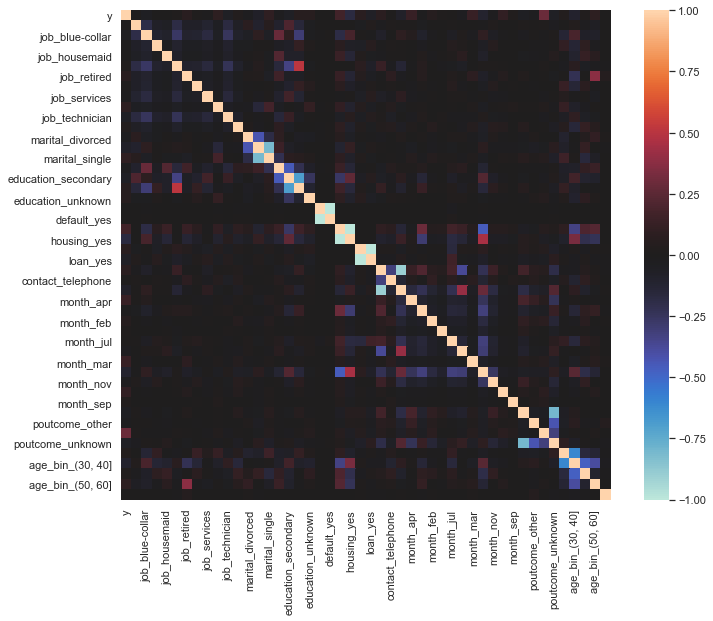

In [25]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_bank_corr, square=True, vmax=1, vmin=-1, center=0)

# Machine Learningを開始

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

enc = OneHotEncoder(sparse=False)

In [27]:
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'age_bin']

In [28]:
train[:-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_bin
id,,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0,"(30, 40]"
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1,"(19, 30]"
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0,"(30, 40]"
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0,"(30, 40]"
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27094,32,admin.,married,tertiary,no,12215,yes,no,cellular,20,apr,121,1,454,0,unknown,0,"(30, 40]"
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0,"(30, 40]"
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0,"(30, 40]"


In [29]:
_tmp = pd.concat([train[cols_o], test[cols_o]], axis=0)
_tmp

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
id,,,,,,,,,,
0,services,married,secondary,no,yes,no,cellular,nov,other,"(30, 40]"
1,entrepreneur,single,tertiary,no,no,no,cellular,aug,unknown,"(19, 30]"
2,management,married,tertiary,no,yes,no,cellular,nov,failure,"(30, 40]"
3,technician,married,secondary,no,yes,yes,unknown,may,failure,"(30, 40]"
4,unemployed,married,primary,no,yes,no,telephone,apr,unknown,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...
18045,self-employed,married,tertiary,no,yes,no,cellular,jul,failure,"(40, 50]"
18046,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,"(30, 40]"
18047,admin.,single,secondary,no,yes,no,unknown,may,unknown,"(30, 40]"


In [30]:
_tmp.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45150,45150,45150,45150,45150,45150,45150,45150,45150
unique,12,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,10043,29218,26754,45136,26237,39380,31754,18818,38525


In [31]:
_tmp.isnull().any()

job          False
marital      False
education    False
default      False
housing      False
loan         False
contact      False
month        False
poutcome     False
age_bin      False
dtype: bool

In [32]:
enc.fit(_tmp)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [33]:
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'age_bin']

## X, X1, yの生成

In [34]:
X = train[cols_o]
X = enc.transform(X) 
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
X1 = test[cols_o]
X1 = enc.transform(X1) 
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X1.shape

(18050, 48)

In [37]:
train[cols_i].values

array([[   31, 12294,    21, ...,     3,   498,     0],
       [   29, 43027,    22, ...,     2,   702,     0],
       [   35, 12252,    11, ...,     1,   826,     0],
       ...,
       [   35, 34531,    28, ...,     2,   121,     0],
       [   30, 99621,    27, ...,     1,   100,     0],
       [   34,  8657,    27, ...,     2,   321,     0]], dtype=int64)

In [38]:
X = np.concatenate([X, train[cols_i].values], axis=1)
X

array([[  0.,   0.,   0., ...,   3., 498.,   0.],
       [  0.,   0.,   1., ...,   2., 702.,   0.],
       [  0.,   0.,   0., ...,   1., 826.,   0.],
       ...,
       [  0.,   0.,   0., ...,   2., 121.,   0.],
       [  1.,   0.,   0., ...,   1., 100.,   0.],
       [  0.,   0.,   0., ...,   2., 321.,   0.]])

In [39]:
X1 = np.concatenate([X1, test[cols_i].values], axis=1)
X1

array([[  0.,   0.,   0., ...,   2., 184.,   2.],
       [  0.,   0.,   0., ...,   3., 241.,   0.],
       [  0.,   0.,   0., ...,   2.,  47.,   0.],
       ...,
       [  1.,   0.,   0., ...,   2., 370.,   0.],
       [  0.,   0.,   0., ...,   2.,  41.,   0.],
       [  0.,   0.,   0., ...,   1., 699.,   0.]])

In [40]:
y = train['y']
y

id
0        0
1        1
2        0
3        0
4        0
        ..
27095    0
27096    0
27097    0
27098    0
27099    0
Name: y, Length: 27100, dtype: int64

In [41]:
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train: {}'.format(X_train))
print('y_train: {}'.format(y_train))

X_train: [[  0.   0.   0. ...   2. 671.   0.]
 [  0.   0.   1. ...   2.  53.   0.]
 [  0.   0.   0. ...   1. 460.   0.]
 ...
 [  0.   0.   1. ...   1. 320.   0.]
 [  0.   0.   1. ...   1.  35.   0.]
 [  0.   1.   0. ...   4. 181.   0.]]
y_train: id
9884     0
16500    0
13843    0
743      0
9362     0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: y, Length: 21680, dtype: int64


In [42]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 5)),
          'eta': [0.01, 0.1, 1.0],
          'gamma': [0, 0.1],
          'nthread': [2, 4],
          'n_estimators': list(range(50, 200, 50)),
         }


## XGBoost

In [43]:
from xgboost import XGBClassifier

xgb_estimator = XGBClassifier(tree_method='gpu_hist', learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1, random_state=0)
# xgb = XGBClassifier()

reg_cv = GridSearchCV(estimator=xgb_estimator, param_grid=params, cv=5, return_train_score=True, scoring='roc_auc')
# reg_cv = GridSearchCV(xgb, params, cv=5, return_train_score=True)
reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method='gpu_hist',
                                     validate_parameters=Non

In [44]:
print('best score: {:0.3f}'.format(reg_cv.score(X_train, y_train)))
print('best params: {}'.format(reg_cv.best_params_))
print('best val score:  {:0.3f}'.format(reg_cv.best_score_))


best score: 0.833
best params: {'eta': 0.01, 'gamma': 0.1, 'max_depth': 4, 'n_estimators': 150, 'nthread': 2}
best val score:  0.820


In [45]:
xgb = reg_cv.best_estimator_
score = xgb.score(X_test, y_test)
print('score: {}' .format(score))

auc = roc_auc_score(y_test, xgb.predict(X_test))
print('auc: {}' .format(auc))

# first time
# score: 0.9321033210332104
# auc: 0.5548852810129964
# second
# score: 0.9319188191881919
# auc: 0.5547861336800597


score: 0.9348708487084871
auc: 0.552691153165009


## LightGBM

In [46]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',  objective='binary', learning_rate=0.01, metric='auc', random_state=0)

reg_cv = GridSearchCV(estimator=lgb, param_grid=params, cv=5, return_train_score=True, scoring='roc_auc')
# reg_cv = GridSearchCV(lgb, params, cv=5, return_train_score=True, verbose=3)
reg_cv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.01, max_depth=-1,
                                      metric='auc', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.01, 0

In [47]:
print('best score: {:0.3f}'.format(reg_cv.score(X_train, y_train)))
print('best params: {}'.format(reg_cv.best_params_))
print('best val score:  {:0.3f}'.format(reg_cv.best_score_))


best score: 0.827
best params: {'eta': 0.01, 'gamma': 0, 'max_depth': 4, 'n_estimators': 150, 'nthread': 2}
best val score:  0.817


In [48]:
lgb = reg_cv.best_estimator_
score = lgb.score(X_test, y_test)
print('score: {}' .format(score))

auc = roc_auc_score(y_test, lgb.predict(X_test))
print('auc: {}' .format(auc))

# first time
# score: 0.9337638376383763
# auc: 0.5508691565533756
# second
# score: 0.933579335793358
# auc: 0.5495428966064262


score: 0.9346863468634686
auc: 0.5489106679900337


In [49]:
predict = lgb.predict(X1)
predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
submit

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
18045,18045,0
18046,18046,0
18047,18047,0
18048,18048,0


In [51]:
submit[1] = predict

In [52]:
submit.to_csv('submit_lightgbm.csv', index=None, header=None)

# Nural Network

In [53]:
batch_size = 64
n_epochs = 100
# n_epochs = 10

## PyTroch

In [54]:
print(X_train)
print(X_train.shape)

[[  0.   0.   0. ...   2. 671.   0.]
 [  0.   0.   1. ...   2.  53.   0.]
 [  0.   0.   0. ...   1. 460.   0.]
 ...
 [  0.   0.   1. ...   1. 320.   0.]
 [  0.   0.   1. ...   1.  35.   0.]
 [  0.   1.   0. ...   4. 181.   0.]]
(21680, 55)


In [55]:
y_train

id
9884     0
16500    0
13843    0
743      0
9362     0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: y, Length: 21680, dtype: int64

In [56]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

train_X = torch.tensor(X_train, dtype=torch.float32)
train_y = torch.tensor(y_train.values)
test_X = torch.tensor(X_test, dtype=torch.float32)
test_y = torch.tensor(y_test.values)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [57]:
train_tensor = TensorDataset(train_X, train_y)
print(train_tensor[0])

train_loader = DataLoader(train_tensor, batch_size=batch_size, shuffle=True)


(tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7000e+01, 6.0309e+04, 2.7000e+01, 3.4500e+02, 2.0000e+00, 6.7100e+02,
        0.0000e+00]), tensor(0))


In [61]:
class Net(nn.Module):
    def __init__(self, col_num):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(col_num, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) # ReLU: max(x, 0)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
net = Net(X_train.shape[1])
net.to(device)


Net(
  (fc1): Linear(in_features=55, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [62]:
# 損失関数
criterion = nn.CrossEntropyLoss() # 他クラス分類:ソフトマックス交差エントロピー誤差
#criterion = nn.MSELoss() # 回帰:平均二乗誤差
#criterion = nn.L1Loss() # 回帰:平均絶対値誤差
# criterion = nn.BCELoss() # 二値分類:バイナリ交差エントロピー
# criterion = nn.BCEWithLogitsLoss() # 二値分類:ロジット・バイナリ交差エントロピー

# 最適化関数
# optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [63]:
for epoch in range(n_epochs):
    total_loss = 0
    
    for i, data in enumerate(train_loader):
#         inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if (epoch+i)%10 == 0:
        print(epoch+1, total_loss)


3 1763.334377259016
13 123.20108704268932
23 108.28213247656822
33 102.43926547467709
43 98.3043957054615
53 97.4999702423811
63 95.31967023015022
73 95.66705506294966
83 95.04424786567688
93 94.87588762491941


In [71]:
_, predicted = torch.max(net(test_X.to(device)).data, 1)
predicted

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')

In [72]:
roc_auc_score(predicted.cpu(), y_test)

# first time
# 0.7168513279233797
# second
# 0.7179735802805394


0.46520214140668265

In [74]:
test_X = torch.tensor(X1, dtype=torch.float32)

_, predicted = torch.max(net(test_X.to(device)).data, 1)
predicted

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')

In [75]:
submit[1] = predicted.cpu()

In [76]:
submit.to_csv('submit_pytorch.csv', index=None, header=None)

## Tensorflow

In [77]:
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics

# tf.set_random_seed(0)

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax'),
#     keras.layers.Dense(1, activation='sigmoid'),
])


In [78]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13014177182846411017,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5925981819833843258
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2511509915
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17722850547600711401
 physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2730664765464423745
 physical_device_desc: "device: XLA_GPU device"]

In [79]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [80]:
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [81]:
model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)


Epoch 1/100
339/339 [==============================] - 1s 2ms/step - loss: 119.0506 - accuracy: 0.8531
Epoch 2/100
339/339 [==============================] - 1s 2ms/step - loss: 1.3664 - accuracy: 0.8976
Epoch 3/100
339/339 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.9131
Epoch 4/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3856 - accuracy: 0.9161
Epoch 5/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.9187
Epoch 6/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.9188
Epoch 7/100
339/339 [==============================] - 1s 2ms/step - loss: 0.2958 - accuracy: 0.9193
Epoch 8/100
339/339 [==============================] - 1s 2ms/step - loss: 0.2863 - accuracy: 0.9196
Epoch 9/100
339/339 [==============================] - 1s 2ms/step - loss: 0.2866 - accuracy: 0.9195
Epoch 10/100
339/339 [==============================] - 1s 2ms/step - loss: 0.2881 - accu

339/339 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.9196
Epoch 79/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.9195
Epoch 80/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.9199
Epoch 81/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3026 - accuracy: 0.9198
Epoch 82/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.9198
Epoch 83/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.9199
Epoch 84/100
339/339 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.9200
Epoch 85/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.9198
Epoch 86/100
339/339 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.9198
Epoch 87/100
339/339 [==============================] - 1s 2ms/step - loss: 0.2958 - accuracy: 

In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


170/170 - 0s - loss: 0.2535 - accuracy: 0.9304

Test accuracy: 0.9304428100585938


In [83]:
y_test

id
700      0
26561    0
24557    0
17483    0
10388    0
        ..
1242     0
3020     0
17446    0
25262    0
20403    1
Name: y, Length: 5420, dtype: int64

In [84]:
predicted = model.predict(X_test)
roc_auc_score(np.argmax(predicted, 1), y_test)

# first time
# 0.6910214087269161
# second
# 0.6845113922678877


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
pred = model.predict(X1)
pred

In [ ]:
pred = np.argmax(pred, 1)
pred

In [ ]:
pred.shape

In [ ]:
submit

In [ ]:
submit[1] = predict
submit.to_csv('submit_tensorflow.csv', index=None, header=None)

## 決定木

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# random_forest.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 10)), 
          'min_samples_leaf': list(range(1, 12, 2))}

grid_search = GridSearchCV(random_forest, params, cv=5, return_train_score=True)
# grid_search = GridSearchCV(random_forest, params, cv=5, return_train_score=True, verbose=3)
grid_search.fit(X, y)

In [ ]:
print('best score: {:0.3f}'.format(reg_cv.score(X_train, y_train)))
print('best params: {}'.format(reg_cv.best_params_))
print('best val score:  {:0.3f}'.format(reg_cv.best_score_))


In [ ]:
random_forest = reg_cv.best_estimator_
score = random_forest.score(X_test, y_test)
print('score: {}' .format(score))

auc = roc_auc_score(y_test, random_forest.predict(X_test))
print('auc: {}' .format(auc))

# first time
# score: 0.933579335793358
# auc: 0.5495428966064262


In [ ]:
predict = random_forest.predict(X1)
submit[1] = predict
submit.to_csv('submit_randomforest.csv', index=None, header=None)